In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [3]:
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [4]:
x = data.drop('0',axis = 1)
y = data['0']

In [5]:
print(x.shape)
print(y.shape)

(372450, 784)
(372450,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In [7]:
x_train = np.reshape(x_train.values,(x_train.shape[0],28,28))

In [8]:
x_test = np.reshape(x_test.values,(x_test.shape[0],28,28))

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(297960, 28, 28)
(74490, 28, 28)
(297960,)
(74490,)


In [10]:
shuffle_data = shuffle(x_train)

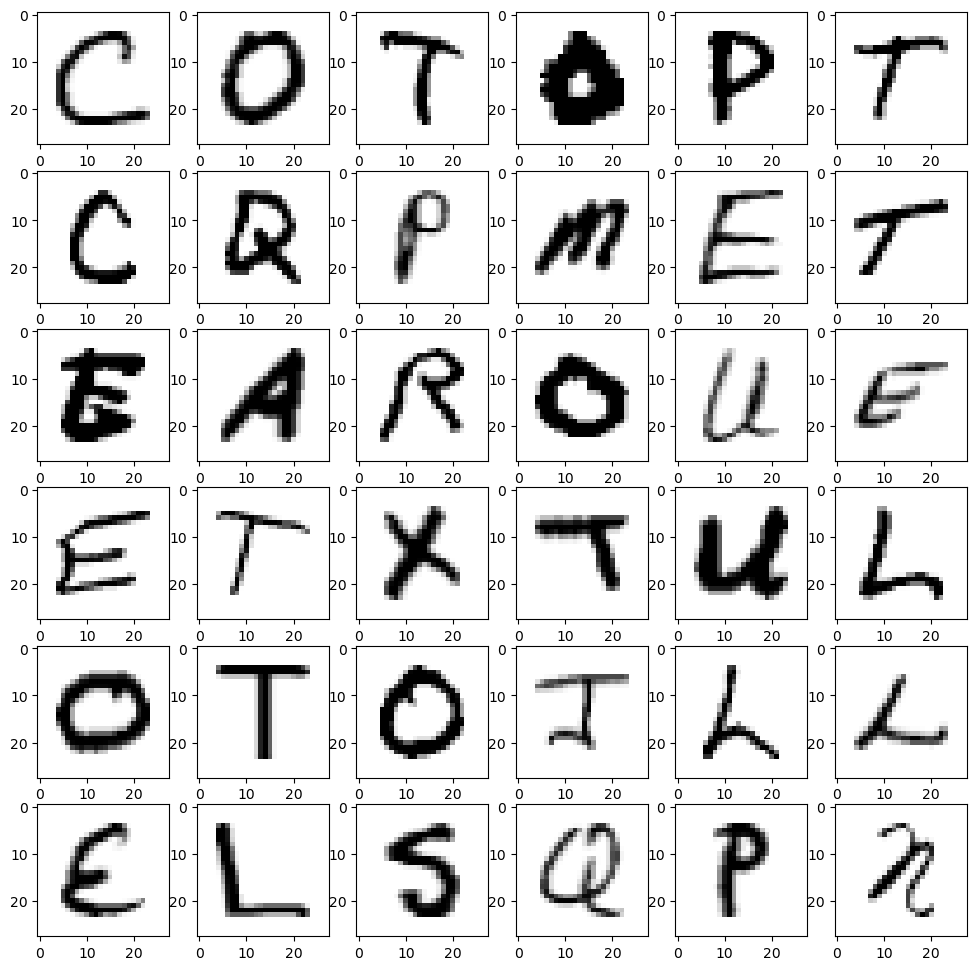

In [11]:
# Visualizing our training data

_, axis = plt.subplots(6,6, figsize = (12,12))
axis = axis.flatten()
for i in range(36):
    axis[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [12]:
# Reshaping our model and adding channel 1 to it

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [13]:
y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')
print("New shape of testing data: ", y_training.shape)
print("New shape of testing data: ", y_testing.shape)

New shape of testing data:  (297960, 26)
New shape of testing data:  (74490, 26)


In [14]:
model = Sequential()
 
model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
 
model.add(Flatten())
 
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [15]:
# x_train.shape,y_training.shape
x_test.shape,y_testing.shape

((74490, 28, 28, 1), (74490, 26))

In [16]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename="construct_model", title="CNN — Model")

In [ ]:
model.fit(x_train, y_training, epochs=20,  validation_data = (x_test,y_testing))

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_testing, batch_size=100)
print("test loss, test acc:", results)

In [ ]:
model.save(r'handwritten_character_recog_model.h5')

In [ ]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [ ]:
_, axes = plt.subplots(4,4, figsize=(10,12))
axes = axes.flatten()
for i in range(16):
    image = np.reshape(x_test[i], (28,28))
    axes[i].imshow(image, cmap="Greys")
    image = np.reshape(x_test[i], (1,28,28,1))
    pred = words[np.argmax([model.predict(image)])]
    axes[i].set_title("Prediction: "+pred)    

In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
 
from keras.models import load_model
model = load_model('handwritten_character_recog_model.h5')
 
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
 
image = cv2.imread('D.png')
image_copy = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400,440))
 
image_copy = cv2.GaussianBlur(image_copy, (7,7), 0)
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
 
final_image = cv2.resize(img_thresh, (28,28))
final_image =np.reshape(final_image, (1,28,28,1))
 
print(final_image.shape)
prediction = words[np.argmax(model.predict(final_image))]
 
cv2.putText(image, "Prediction: " + prediction, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,255,0))
cv2.imshow('ProjectGurukul handwritten character recognition ', image)
 
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()